In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn import datasets



In [2]:
df = pd.read_csv('KAG_conversion_data.csv')
df.set_index('ad_id',inplace = True )

#CTR = Click Through rate
#CR = Total Conversion Rate Rate
#CCLICK = Cost per Conversion $

df['CTR'] = df['Clicks']/df['Impressions']
df['TCR'] = df['Total_Conversion']/df['Impressions']
df['ACR'] = df['Approved_Conversion']/df['Impressions']
df['CCLICK'] = df['Total_Conversion'].apply(lambda x: 0 if x == 0 else 1)  

df['CCLICK'] = df['CCLICK']*df['Spent']/df['Total_Conversion']
df['CCLICK'] = df['CCLICK'].fillna(0) 
df['purchased'] = df['Approved_Conversion'].apply(lambda x: 0 if x == 0 else 1)  

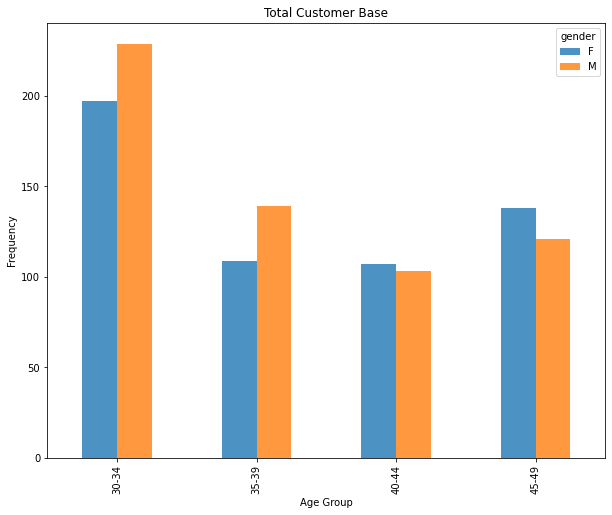

In [6]:
df_summary_plot = pd.crosstab(df.age,df.gender)

df_summary_plot.plot(kind = 'bar',figsize = (10,8), alpha = 0.8)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Total Customer Base')
plt.show()

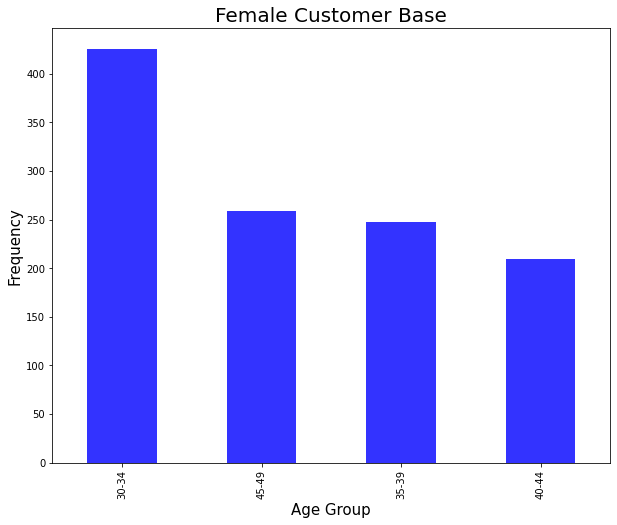

In [8]:
plt.figure()
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
df_summary_plot['age'].value_counts().plot(kind = 'bar',figsize = (10,8), color = 'blue', alpha = 0.8)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Female Customer Base')
plt.show()

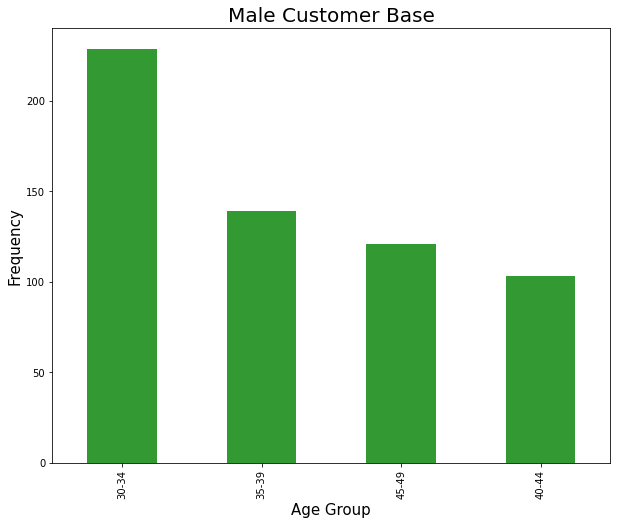

In [9]:
plt.figure()
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
df_summarym['age'].value_counts().plot(kind = 'bar',figsize = (10,8), color = 'green', alpha = 0.8)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Male Customer Base')
plt.show()

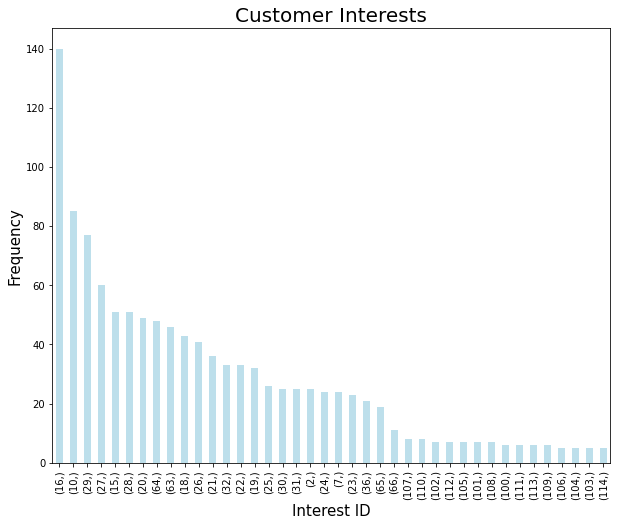

In [10]:
#histogram of interestss

df_interests = df[['interest']]
plt.figure()
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20

df_interests.value_counts().plot(kind = 'bar',figsize = (10,8), color = 'lightblue', alpha = 0.8)
#df_summarym['age'].hist(label = 'gender', figsize = (10,8), color = 'orange', alpha = 0.8)


plt.xlabel('Interest ID')
plt.ylabel('Frequency')
plt.title('Customer Interests')
plt.show()

In [11]:
#variables, age, gender, interest

df_clean = df.copy()
df_clean['age'].unique()
hdict1 = {'30-34' : 1, '35-39': 2, '40-44': 3, '45-49': 4    
        }
hdict2 = {'M' : 0, 'F': 1   
        }
df_clean['age'] = df_clean['age'].replace(hdict1)
df_clean['gender'] = df_clean['gender'].replace(hdict2)
df_clean


,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,TCR,ACR,CCLICK,purchased
ad_id,,,,,,,,,,,,,,,
708746,916,103916,1,0,15,7350,1,1.430000,2,1,0.000136,0.000272,0.000136,0.715000,1
708749,916,103917,1,0,16,17861,2,1.820000,2,0,0.000112,0.000112,0.000000,0.910000,0
708771,916,103920,1,0,20,693,0,0.000000,1,0,0.000000,0.001443,0.000000,0.000000,0
708815,916,103928,1,0,28,4259,1,1.250000,1,0,0.000235,0.000235,0.000000,1.250000,0
708818,916,103928,1,0,28,4133,1,1.290000,1,1,0.000242,0.000242,0.000242,1.290000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314410,1178,179977,4,1,109,1129773,252,358.189997,13,2,0.000223,0.000012,0.000002,27.553077,1
1314411,1178,179978,4,1,110,637549,120,173.880003,3,0,0.000188,0.000005,0.000000,57.960001,0
1314412,1178,179979,4,1,111,151531,28,40.289999,2,0,0.000185,0.000013,0.000000,20.145000,0


# K Means Clustering

In [12]:
# K MEans Clustering on all data
pred = df_clean[['age', 'gender', 'interest']].copy()
X = pd.get_dummies(data = pred, columns = ['age', 'gender', 'interest'], 
                                      prefix = ['age', 'gender', 'interest'] )
n_clusters = 8
kmeans = KMeans(n_clusters, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_



In [13]:
kmeans.score(X)

-1082.739646625192

In [14]:
#use customer segmentation only
df_custom_seg = df_clean.copy()
df_custom_seg['Labels'] = labels

#calculate sales from each label
sum_purch = []

for i in range(n_clusters):
    df_custom_seg_i = df_custom_seg.loc[df_custom_seg['Labels']==i]
    sum_purch.append(df_custom_seg_i["Approved_Conversion"].sum())
  

print(sum_purch)


[96, 195, 299, 112, 112, 77, 93, 95]


In [15]:
#get total cost of all advertising and total conversions
Total_Cost = df_custom_seg['Spent'].sum()
sum_cost = []
label_list = []

for i in range(n_clusters):
    df_custom_seg_i = df_custom_seg.loc[df_custom_seg['Labels']==i]
    sum_cost.append(df_custom_seg_i["Spent"].sum())
    label_list.append(i)

print(sum_cost)



[7317.4600038769995, 7611.479995127001, 7640.919991251001, 13433.209992776998, 5051.080002508, 4193.149997201, 7396.579983637, 6061.349991827]


<Figure size 432x288 with 0 Axes>

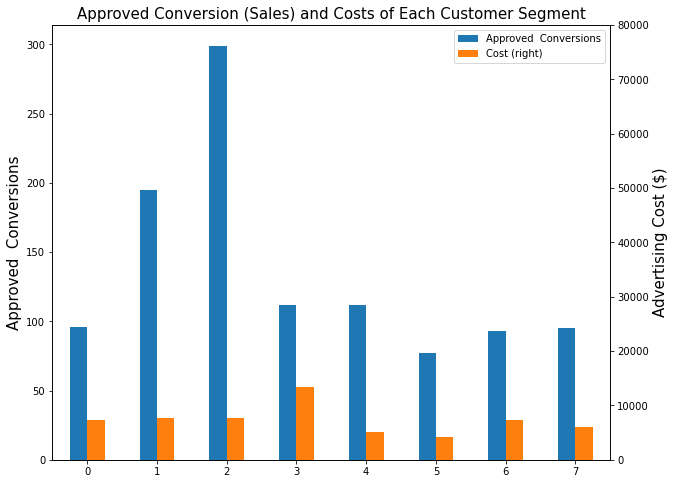

In [16]:
#plot cost and sales on bar plot

new_df1 = pd.DataFrame({'Approved  Conversions':sum_purch, 'Cost':sum_cost})

plt.figure()
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15
new_df1.plot( kind= 'bar' , secondary_y= 'Cost' , rot= 0, figsize = (10,8), title = 'Approved Conversion (Sales) and Costs of Each Customer Segment' )
ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes
ax1.set_ylabel('Approved  Conversions')
ax2.set_ylabel('Advertising Cost ($)')
ax2.set_ylim(0,80000)
plt.show()



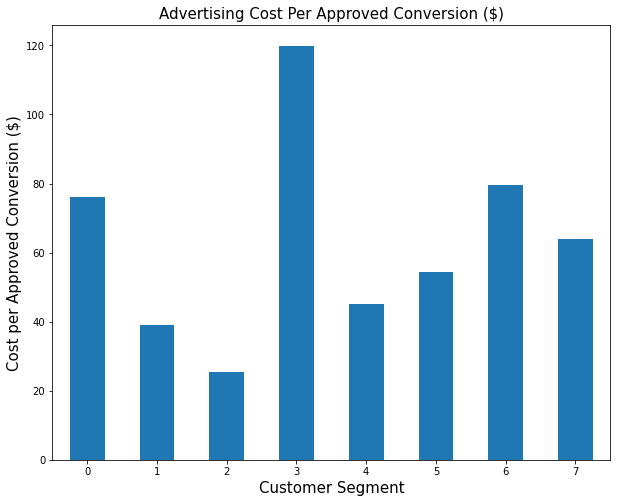

In [17]:
#plot Costt/Sale on Bar Plot
new_df2 = new_df1.copy()
new_df2['Cost Per Sale'] = new_df2['Cost']/new_df2['Approved  Conversions']
plt.figure()
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15
new_df2['Cost Per Sale'].plot( kind= 'bar' , rot= 0, figsize = (10,8), title = 'Advertising Cost Per Approved Conversion ($)' )
plt.xlabel('Customer Segment')
plt.ylabel('Cost per Approved Conversion ($)')

plt.show()


(array([  0., 139.,   0.,   0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5]),
 <BarContainer object of 4 artists>)

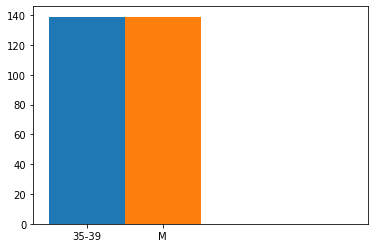

In [18]:
#get age, gender and interests of customer segments 1 and 2
segment = 4

hdict1 = {1:'30-34', 2: '35-39', 3:'40-44', 4:'45-49'    
        }
df_age = df_custom_seg.loc[df_custom_seg['Labels']==segment].copy()
df_age = df_age[['Labels', 'age']]
df_age['age'] = df_age['age'].replace(hdict1)
plt.hist(df_age['age'], bins =np.arange(5)-0.5)

hdict2 = {0: 'M' , 1: 'F'   
        }
df_gender = df_custom_seg.loc[df_custom_seg['Labels']==segment].copy()
df_gender = df_gender[['Labels', 'gender']]
df_gender['gender'] = df_gender['gender'].replace(hdict2)
plt.hist(df_gender['gender'], bins =np.arange(5)-0.5)


In [19]:
df_interest = df_custom_seg.loc[df_custom_seg['Labels']==segment].copy()
df_interest = df_interest[['Labels', 'interest']]
n = 5
top5list = df_interest['interest'].value_counts()[:n].index.tolist()
df_top5 = df_interest.copy()
boolean_series = df_top5.interest.isin(top5list)
df_top5 = df_top5[boolean_series]
#boolean_series = df.fruit.isin(value_list)
#filtered_df = df[boolean_series]
top5list

[16, 28, 29, 10, 15]

In [20]:
df_interest = df_custom_seg.loc[df_custom_seg['Labels']==segment].copy()
df_interest = df_interest[['Labels', 'interest']]
n = 5
top5list = df_interest['interest'].value_counts()[:n].index.tolist()
df_top5 = df_interest.copy()
boolean_series = df_top5.interest.isin(top5list)
df_top5 = df_top5[boolean_series]
#boolean_series = df.fruit.isin(value_list)
#filtered_df = df[boolean_series]
top5list

[16, 28, 29, 10, 15]

In [21]:
# K MEans Clustering on just those that purchased
df_purchased = df_clean.loc[df['Approved_Conversion'] ==1]
pred = df_purchased[['age', 'gender', 'interest']].copy()
X = pd.get_dummies(data = pred, columns = ['age', 'gender', 'interest'], 
                                      prefix = ['age', 'gender', 'interest'] )
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
X['Labels'] = labels
X

,age_1,age_2,age_3,age_4,gender_0,gender_1,interest_2,interest_7,interest_10,interest_15,...,interest_106,interest_107,interest_108,interest_109,interest_110,interest_111,interest_112,interest_113,interest_114,Labels
ad_id,,,,,,,,,,,,,,,,,,,,,
708746,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
708818,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
708820,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
708895,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
709059,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314394,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1314396,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1314400,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


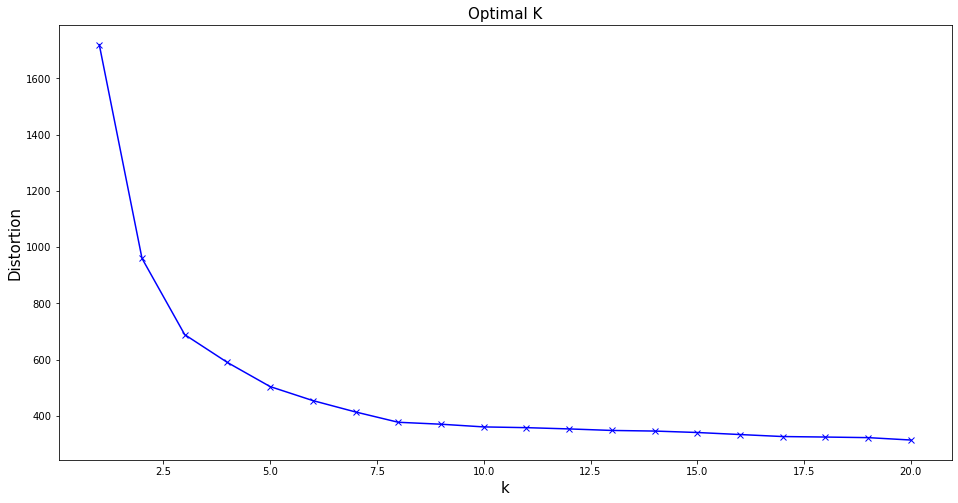

In [22]:
distortions = []
K = range(1,21)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K')
plt.show()

In [23]:
df_custom_seg_filt = df_custom_seg[(df_custom_seg['Labels']==4) | (df_custom_seg['Labels']==2)| (df_custom_seg['Labels']==1)]
df_custom_seg_filt['Approved_Conversion'].sum()

606